In [1]:
import cv2
import matplotlib.pyplot as plt
import dlib

In [2]:
image_color = cv2.imread("./data/people1.jpg")
image_color.shape

(1280, 1920, 3)

In [3]:
cv2.resize(image_color, (800, 600)).shape

(600, 800, 3)

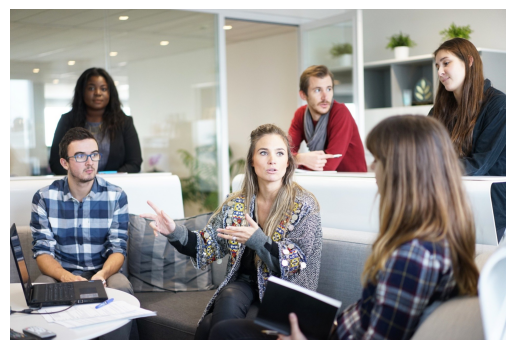

In [4]:
img_plot = cv2.cvtColor(image_color,cv2.COLOR_BGR2RGB)
plt.imshow(img_plot)
plt.axis(False);

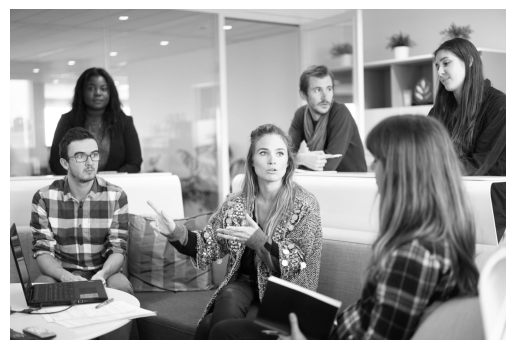

In [5]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, "gray")
plt.axis(False);

In [6]:
# detecting face
face_detector = cv2.CascadeClassifier("./data/haarcascade_frontalface_default.xml")
detections = face_detector.detectMultiScale(image_gray)  # Gray para disminuir el calculo de dim de 3 a 1
print(f"Coordenadas:\n{detections}\nN° de Rostros detectados {len(detections)}")

Coordenadas:
[[1639  159  141  141]
 [ 284  263  113  113]
 [1148  261  129  129]
 [ 928  488  172  172]
 [ 229  509  142  142]
 [ 103  784   56   56]
 [  44  919   30   30]]
N° de Rostros detectados 7


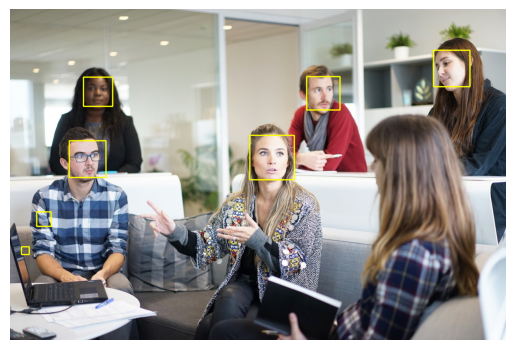

In [7]:
for (x, y, w, h) in detections:
  #print(x, y, w, h)
  cv2.rectangle(image_color, (x, y), (x + w, y ), (0,0,255), 3) # line recta
  cv2.rectangle(image_color, (x, y), (x + w, y + h), (0,255,255), 3) # 0,255,255 = colores, 3 = grosor del rectangulo

plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.axis('off');

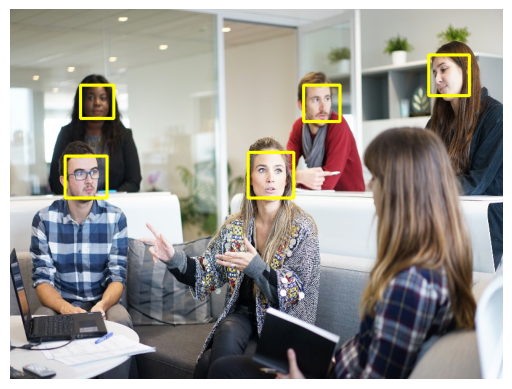

In [8]:
# haarcascade parameters
image_color = cv2.resize(cv2.imread("./data/people1.jpg"),(800,600))
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
detections_2 = face_detector.detectMultiScale(image_gray, scaleFactor=1.08) # scaleFactor debe ser >1, defult = 1.1
for (x, y, w, h) in detections_2:
  # print(x, y, w, h)
  cv2.rectangle(image_color, (x, y), (x + w, y + h), (0,255,255), 3) # 0,255,255 = colores, 3 = grosor del rectangulo

plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.axis('off');

47 47
49 49
46 46
47 47
51 51
44 44
50 50
51 51
51 51
47 47
52 52
49 49


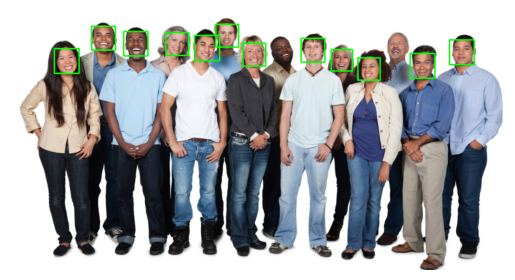

In [9]:
image = cv2.imread('./data/people2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.2, minNeighbors=7, 
                                            minSize=(20,20), maxSize=(100,100)) # size box for  detection, default (30,30)
for (x, y, w, h) in detections:
  print(w, h) # size box
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
plt.imshow( cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
plt.axis(False);

38 38
24 24
25 25
36 36
37 37
43 43
24 24
26 26
39 39


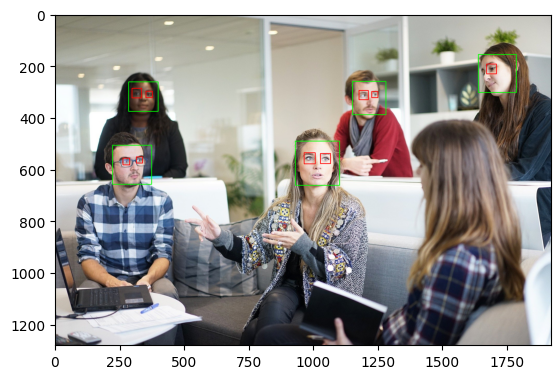

In [10]:
# Eye detection
eye_detector = cv2.CascadeClassifier('./data/haarcascade_eye.xml')
image = cv2.imread('./data/people1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_detections = face_detector.detectMultiScale(image_gray, scaleFactor = 1.3, minSize = (30,30))
for (x, y, w, h) in face_detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)

eye_detections = eye_detector.detectMultiScale(image_gray, scaleFactor = 1.1, minNeighbors=10, maxSize=(70,70))
for (x, y, w, h) in eye_detections:
  print(w, h)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR));

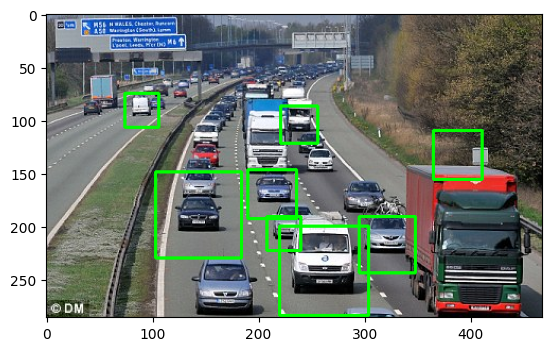

In [11]:
# Cars
car_detector = cv2.CascadeClassifier('./data/cars.xml')
image = cv2.imread('./data/car.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = car_detector.detectMultiScale(image_gray, scaleFactor = 1.03, minNeighbors=5)
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR));

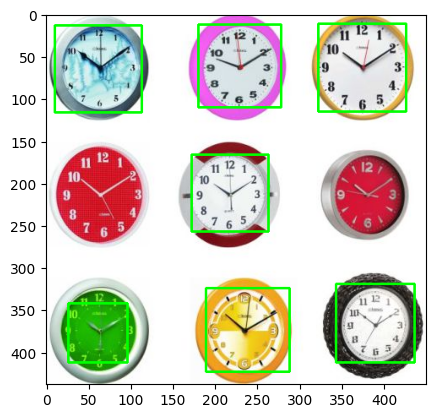

In [12]:
# Clocks
clock_detector = cv2.CascadeClassifier('./data/clocks.xml')
image = cv2.imread('./data/clock.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = clock_detector.detectMultiScale(image_gray, scaleFactor = 1.03, minNeighbors=1)
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR));

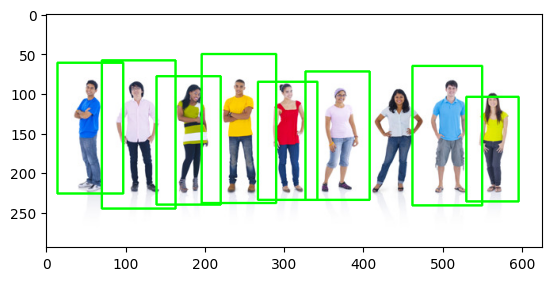

In [13]:
# Full body
full_detector = cv2.CascadeClassifier('./data/fullbody.xml')
image = cv2.imread('./data/people3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = full_detector.detectMultiScale(image_gray, scaleFactor = 1.05, minNeighbors=5,
                                              minSize = (50,50))
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_RGB2BGR));

### dlib - Detecting faces with HOG > cascade classifier

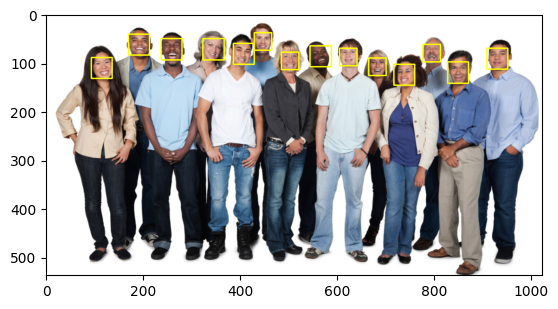

In [14]:
image = cv2.imread('./data/people2.jpg')
face_detector_hog = dlib.get_frontal_face_detector()
detections = face_detector_hog(image, 1) # Es = a scaleFactor
detections, len(detections)
for face in detections:
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (l, t), (r, b), (0, 255, 255), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR));

### Detecting faces with CNN (Convolutional Neural Networks)

1.1334971189498901
1.1206697225570679
1.0991474390029907
1.0879355669021606
1.0788949728012085
1.0717695951461792
1.0714964866638184
1.068716049194336
1.0617426633834839
1.058147668838501
1.0536770820617676
1.05070161819458
1.0387641191482544
1.0372236967086792


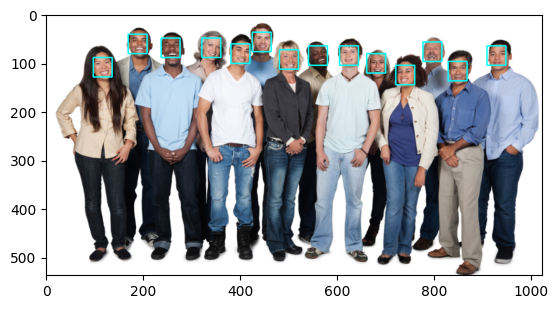

In [15]:
image = cv2.imread('./data/people2.jpg')
cnn_detector = dlib.cnn_face_detection_model_v1('./data/mmod_human_face_detector.dat')

detections = cnn_detector(image, 1) # Es = a scaleFactor
for face in detections:
  l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  print(c)
  cv2.rectangle(image, (l, t), (r, b), (255, 255, 0), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR));

### Comparation Haarcascade x HOG x CNN

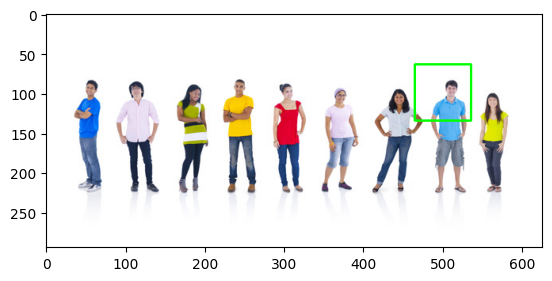

In [16]:
# Haarcascade
image = cv2.imread('./data/people3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
haarcascade_detector = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')
detections = haarcascade_detector.detectMultiScale(image_gray, scaleFactor = 1.001, minNeighbors=5, minSize = (5,5))
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR));

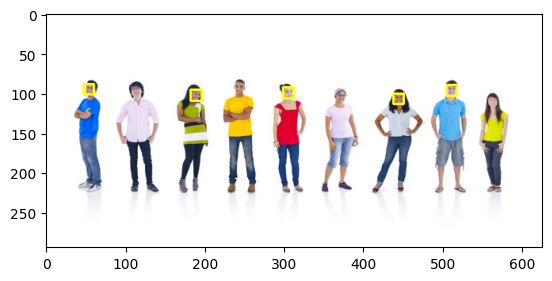

In [17]:
# HOG
image = cv2.imread('./data/people3.jpg')
face_detector_hog = dlib.get_frontal_face_detector()
detections = face_detector_hog(image, 4)
for face in detections:
    l, t, r, b = (face.left(), face.top(), face.right(), face.bottom())
    cv2.rectangle(image, (l, t), (r, b), (0, 255, 255), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR));

#### CNN

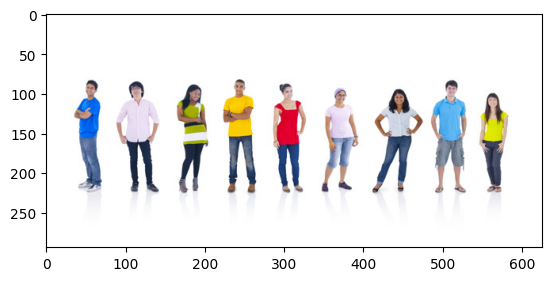

In [21]:
# CNN
image = cv2.imread('./data/people3.jpg')
cnn_detector = dlib.cnn_face_detection_model_v1('./data/mmod_human_face_detector.dat')
detections = cnn_detector(image, 1)
for face in detections:
  l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  print(c)
  cv2.rectangle(image, (l, t), (r, b), (255, 255, 0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR));